# Practical Session - Graph Mining with Python

## Import

In [13]:
# !pip install networkx scikit-learn 

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/10.6 MB 7.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/10.6 MB 18.6 MB/s eta 0:00:01
   ------------ --------------------------- 3.2/10.6 MB 25.7 MB/s eta 0:00:01
   ----------------------- ---------------- 6.2/10.6 MB 36.3 MB/s eta 0:00:01
   -------------------------------- ------- 8.6/10.6 MB 39.0 MB/s eta 0:00:01
   ---------------------------------------  10.6/10.6 MB 50.4 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 43.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/302.2 kB ? eta -:--:--
   --------------------------------------- 302.2/302.2 kB 18.2 MB/s eta 0:00:00
   ----

In [14]:
# Import NetworkX for graph operations
import networkx as nx
# Additional imports: matplotlib for plotting
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import normalized_mutual_info_score

## Creating a Graph

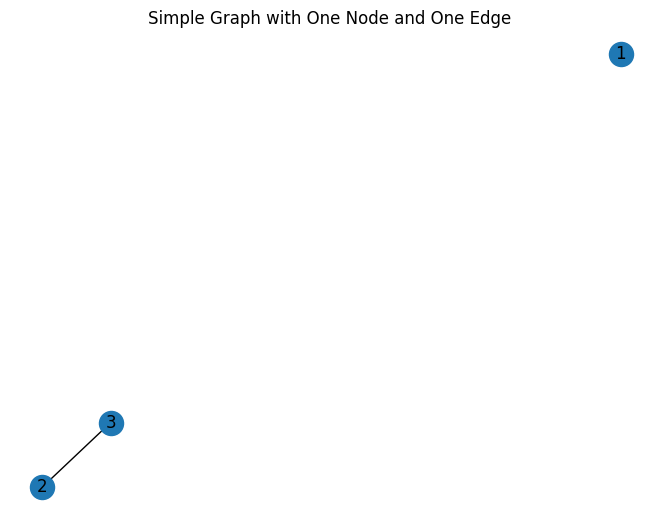

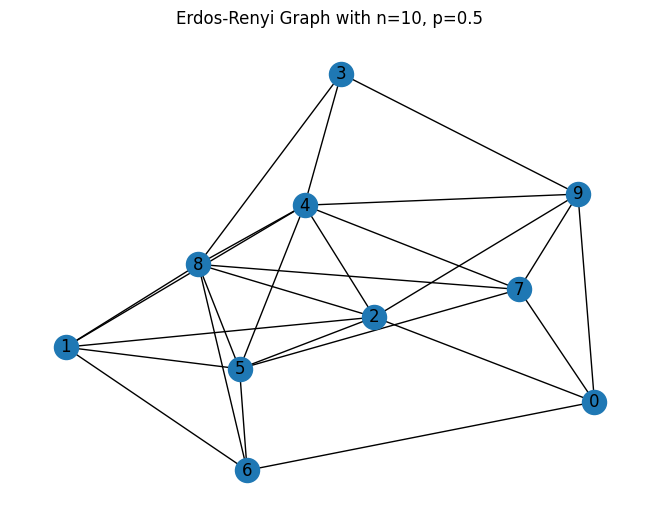

In [4]:
# Create an empty graph
G = nx.Graph()
# Add nodes and edges
G.add_node(1)
G.add_edge(2, 3)

# Plot the graph
nx.draw(G, with_labels=True)
plt.title("Simple Graph with One Node and One Edge")
plt.show()

# Generate a random Erdos-Renyi graph
G_er = nx.erdos_renyi_graph(n=10, p=0.5)

# Plot the Erdos-Renyi graph
nx.draw(G_er, with_labels=True)
plt.title("Erdos-Renyi Graph with n=10, p=0.5")
plt.show()


## Loading a Graph

This code demonstrates how to load a graph from a file, modify it by adding nodes and edges, and then plot it using NetworkX and matplotlib. It also shows how to draw the Karate Club graph using various layouts provided by NetworkX. The default layout used by nx.draw() is the spring layout, which positions nodes using a force-directed algorithm to simulate a system of springs and repulsion between nodes.

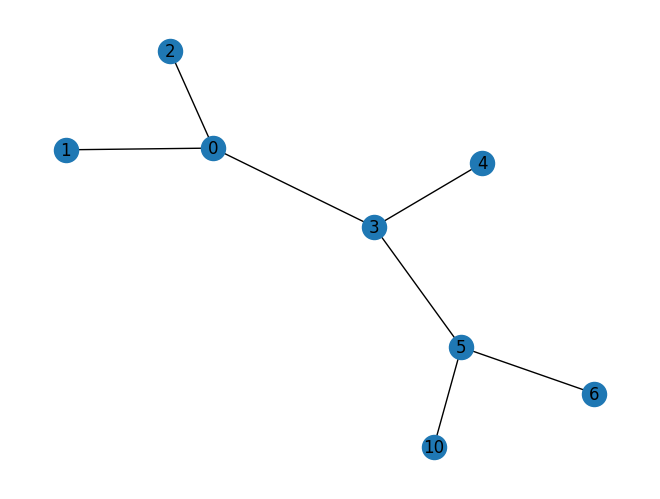

In [2]:
# Read the graph
G = nx.read_edgelist("./graph0.txt")

# Add the node "10" and an edge between "5" and "10".
G.add_node("10")
G.add_edge("5", "10")

# Plot the graph
nx.draw(G, with_labels=True)
plt.show()

# Load the Karate Club graph
karate_club_graph = nx.karate_club_graph()

## Drawing a Graph

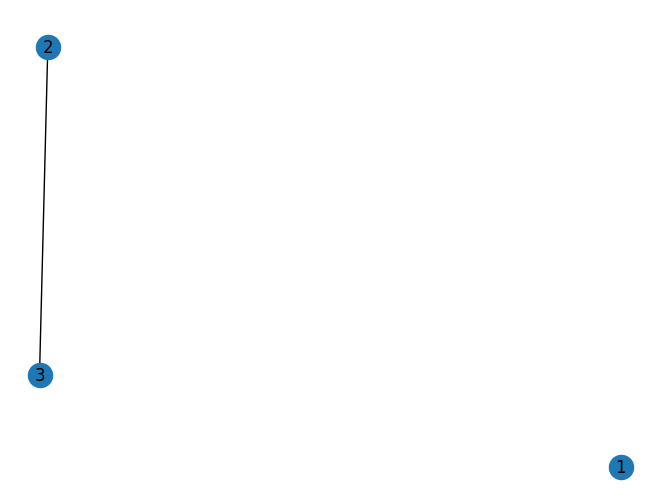

In [4]:
# Draw the graph using matplotlib
nx.draw(G, with_labels=True)
plt.show()

## Degree Distribution

In [5]:
# Function to plot degree distribution
def plot_degree_distribution(G, title):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1, 1), density=True)
    plt.title(title)
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()

The degree distribution of the Karate Club graph likely show a few high-degree nodes (hubs) and many low-degree nodes.

**Observation** : 
- The distribution is skewed, with a few nodes having high degrees (indicative of hubs) and many nodes having low degrees.
- This is typical of social networks where some individuals are more connected than others.

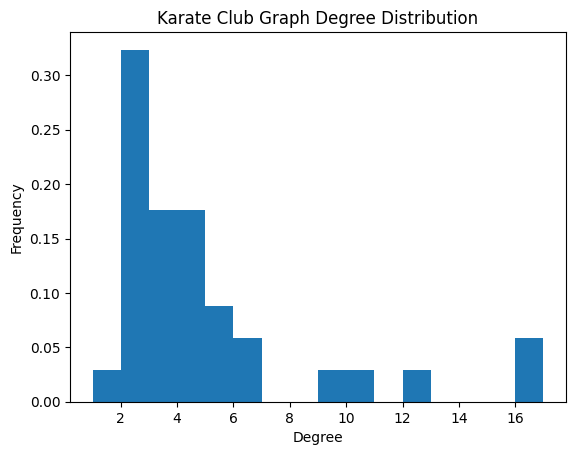

In [6]:
# 1. Karate Club Graph
karate_club_graph = nx.karate_club_graph()
plot_degree_distribution(karate_club_graph, "Karate Club Graph Degree Distribution")

For Erdos-Renyi graphs, we see different patterns based on n and p. With higher p, the graph becomes denser.

**Observation** : 
- As n increases, the degree distribution becomes smoother.
- For lower p values (like 0.2), the degree distribution is more spread out, indicating a sparser graph.
- Higher p values (like 0.8) lead to denser graphs with more nodes having a higher degree.

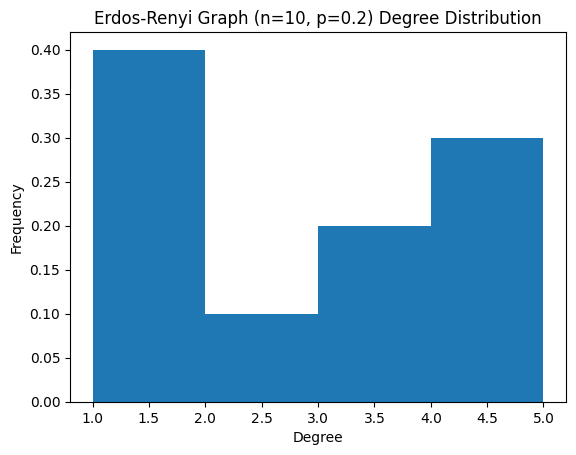

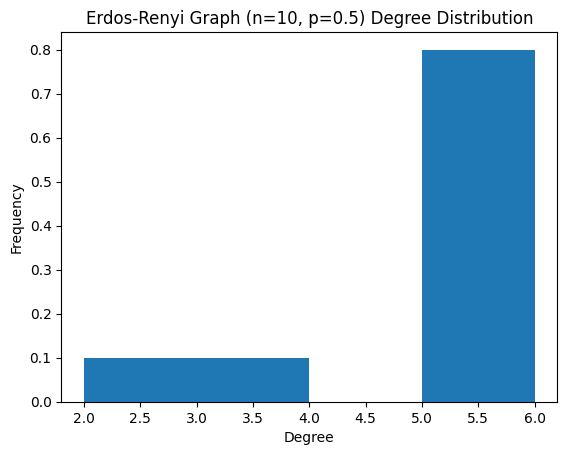

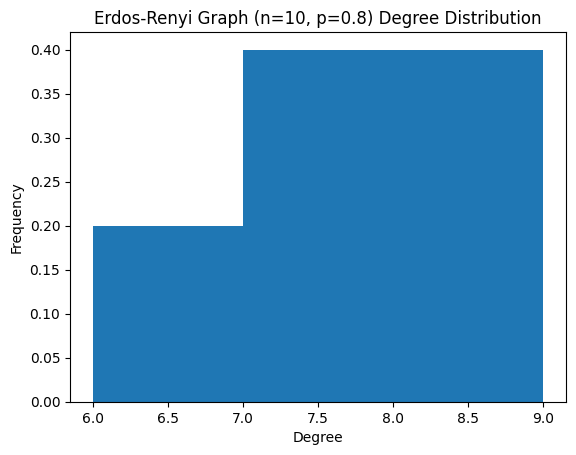

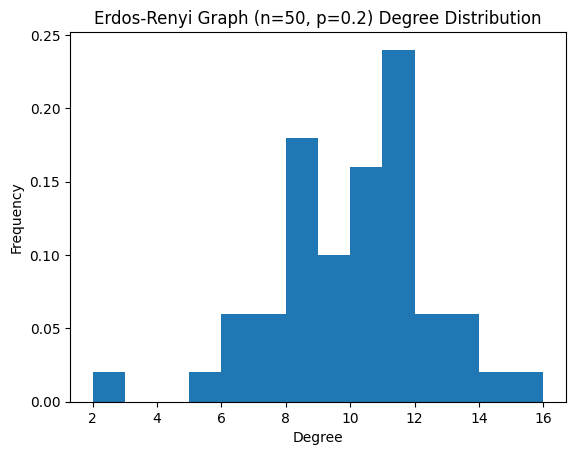

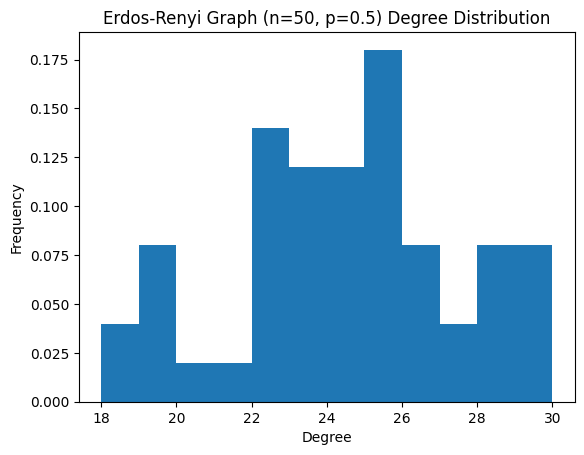

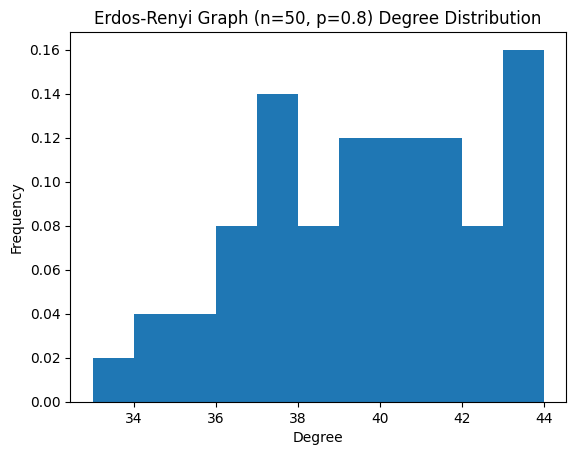

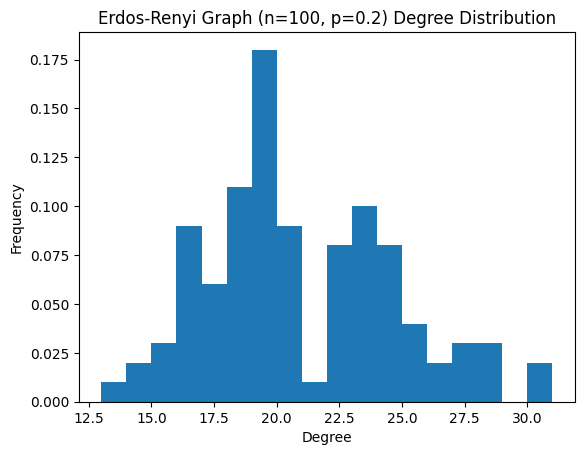

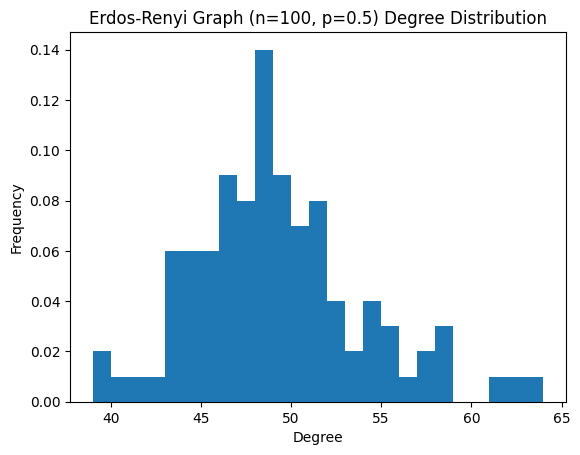

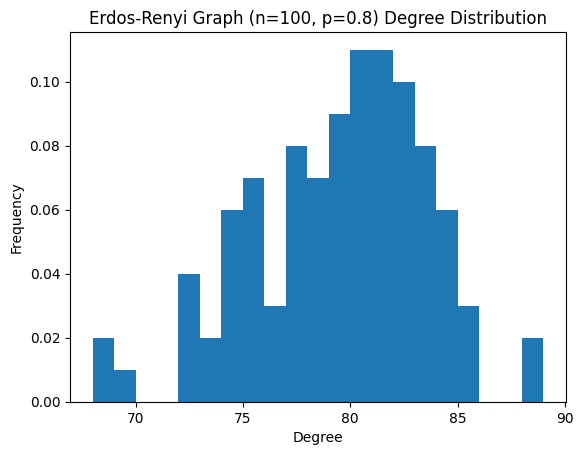

In [7]:
# 2. Random Graph (Erdos-Renyi) for different values of n and p
n_values = [10, 50, 100]  # Example n values
p_values = [0.2, 0.5, 0.8]  # Example p values
for n in n_values:
    for p in p_values:
        G_er = nx.erdos_renyi_graph(n, p)
        plot_degree_distribution(G_er, f"Erdos-Renyi Graph (n={n}, p={p}) Degree Distribution")

The Connected Watts-Strogatz graph exhibits a degree distribution between regular lattices and random graphs.

**Observation** : 
- The degree distribution is quite uniform due to the regularity in the initial ring lattice before rewiring.
- This graph type combines characteristics of regular lattices and random graphs, which is reflected in the relatively uniform degree distribution.

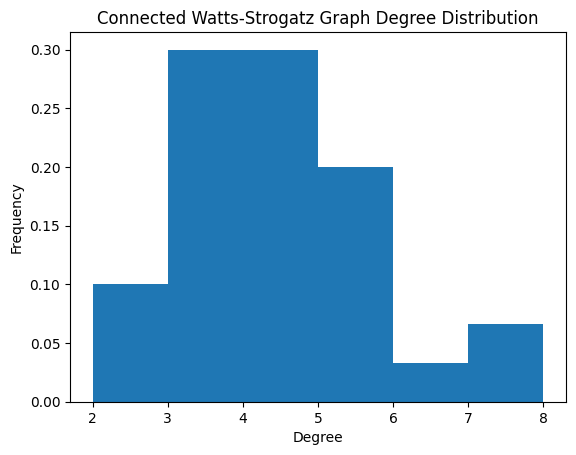

In [8]:
# 3. Connected Watts-Strogatz Graph
n, k, p = 30, 4, 0.5  # parameters
G_ws = nx.connected_watts_strogatz_graph(n, k, p)
plot_degree_distribution(G_ws, "Connected Watts-Strogatz Graph Degree Distribution")

The Barabási-Albert graph shows a scale-free network with a power-law degree distribution.

**Observation** : 
- Exhibits a scale-free network characteristic, with a few nodes (hubs) having very high degrees and many nodes having lower degrees.
- This kind of power-law distribution is common in real-world networks like the internet or citation networks.

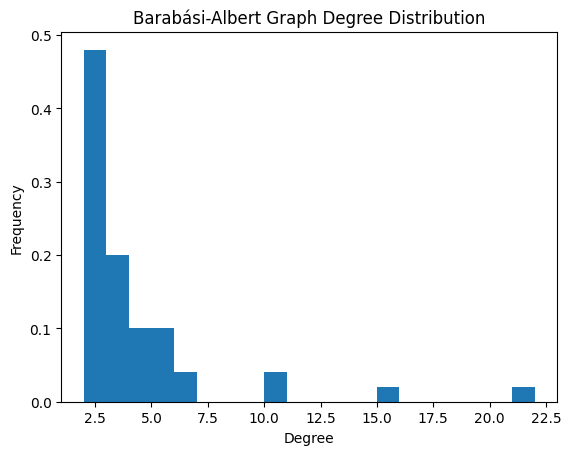

In [9]:
# 4. Barabási-Albert Graph
n, m = 50, 2  # Example parameters
G_ba = nx.barabasi_albert_graph(n, m)
plot_degree_distribution(G_ba, "Barabási-Albert Graph Degree Distribution")

The LFR Benchmark graph is designed to mimic real-world networks with a community structure, and its degree distribution will reflect this.

**Observation** : 
- Designed to mimic real-world networks with community structures.
- Shows a mix of high-degree nodes (likely community connectors) and many low-degree nodes.
- The distribution is not as smooth as in Erdos-Renyi or Watts-Strogatz graphs, reflecting the complex community structure.

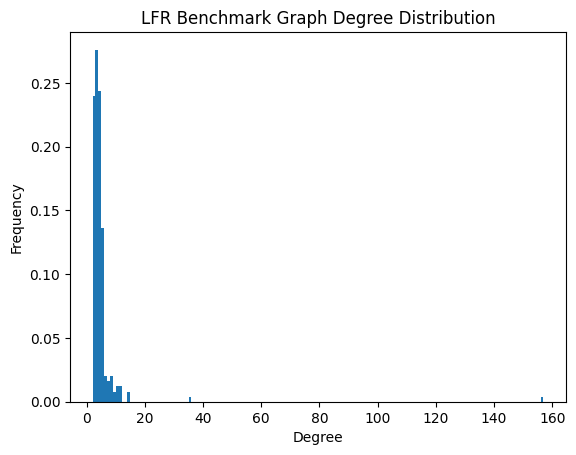

In [10]:
# 5. LFR Benchmark Graph
params = {
    'n': 250,
    'tau1': 3,
    'tau2': 1.5,
    'mu': 0.1,
    'average_degree': 5,
    'min_community': 20,
    'seed': 10
}
G_lfr = nx.LFR_benchmark_graph(**params)
plot_degree_distribution(G_lfr, "LFR Benchmark Graph Degree Distribution")

**Conclusion** : 
Each graph type exhibits distinct characteristics in its degree distribution, reflecting underlying structural differences. These differences are crucial in network analysis and have implications for understanding the dynamics and properties of various real-world networks. 

## Community Detection

In [18]:
# Function to calculate NMI score
def calculate_nmi(G, detected_communities, ground_truth_labels):
    detected_labels = [community for node in G for community, comm_nodes in enumerate(detected_communities) if node in comm_nodes]
    nmi_score = normalized_mutual_info_score(ground_truth_labels, detected_labels)
    return nmi_score

In [19]:
# 1. Create an LFR Benchmark Graph
params = {
    'n': 250,
    'tau1': 3,
    'tau2': 1.5,
    'mu': 0.1,
    'average_degree': 5,
    'min_community': 20,
    'seed': 10
}
G_lfr = nx.LFR_benchmark_graph(**params)
ground_truth_communities = nx.get_node_attributes(G_lfr, 'community')
ground_truth_labels = [community for node, community in ground_truth_communities.items()]


In this code snippet, we used the Greedy Modularity Communities, asyn_fluidc, label_propagation, girvan_newman and compare their NMI scores with the ground truth.

In [20]:
# 2. Detect Communities Using Different Methods
# Greedy Modularity Communities
communities_greedy_modularity = list(nx.community.greedy_modularity_communities(G_lfr))
nmi_greedy_modularity = calculate_nmi(G_lfr, communities_greedy_modularity, ground_truth_labels)

# Asynchronous Fluid Communities
communities_asyn_fluid = list(nx.community.asyn_fluidc(G_lfr, k=5))
nmi_asyn_fluid = calculate_nmi(G_lfr, communities_asyn_fluid, ground_truth_labels)

# Label Propagation
communities_label_prop = list(nx.community.label_propagation_communities(G_lfr))
nmi_label_prop = calculate_nmi(G_lfr, communities_label_prop, ground_truth_labels)

# Girvan-Newman Algorithm (taking only the top level of hierarchy)
communities_girvan_newman = next(nx.community.girvan_newman(G_lfr))
nmi_girvan_newman = calculate_nmi(G_lfr, communities_girvan_newman, ground_truth_labels)

The NMI score ranges from 0 (no mutual information) to 1 (perfect correlation), thus providing a quantitative measure of how closely the detected communities resemble the ground-truth communities.

In [21]:
# 3. Compare with Ground-Truth Communities
print(f"NMI Score for Greedy Modularity Communities: {nmi_greedy_modularity}")
print(f"NMI Score for Asynchronous Fluid Communities: {nmi_asyn_fluid}")
print(f"NMI Score for Label Propagation Communities: {nmi_label_prop}")
print(f"NMI Score for Girvan-Newman Communities: {nmi_girvan_newman}")

NMI Score for Greedy Modularity Communities: 0.43034028609116215
NMI Score for Asynchronous Fluid Communities: 0.3480125675302318
NMI Score for Label Propagation Communities: 0.5082008772066264
NMI Score for Girvan-Newman Communities: 0.2270430150514101


**Observation** : 
- Greedy Modularity Communities:
    - NMI Score: 0.4303
    - This score suggests a moderate level of agreement with the ground-truth communities. The Greedy Modularity algorithm, which optimizes for modularity, has managed to capture a significant part of the community structure, but there is room for improvement.

- Asynchronous Fluid Communities:
    - NMI Score: 0.3480
    - The lower NMI score indicates a lesser degree of similarity to the ground-truth communities compared to the Greedy Modularity algorithm. The Asynchronous Fluid model, designed for graphs with well-defined communities, might not be as effective in this particular graph's structure.
    
- Label Propagation Communities:
    - NMI Score: 0.5082
    - The highest NMI score among the methods tested, indicating a better correspondence with the ground-truth communities. Label Propagation is a simple and fast algorithm, and its performance here suggests it is quite effective in detecting communities in this LFR graph.

- Girvan-Newman Communities:
    - NMI Score: 0.2270
    - The lowest score among the tested methods, suggesting that the Girvan-Newman algorithm, which focuses on removing edges iteratively based on edge betweenness centrality, is not as effective in uncovering the true community structure for this graph.

**Conclusion** :
The Label Propagation method shows the highest similarity to the ground-truth communities for the LFR Benchmark Graph, making it the most effective among the tested algorithms. The Greedy Modularity method also shows reasonable effectiveness, while the Asynchronous Fluid and Girvan-Newman methods are less effective for this particular graph's community structure.

## An Example: the WormNet v.3-GS Graph

In [22]:
# Load the WormNet v.3-GS graph from the provided file
file_path = './WormNet.v3.benchmark.txt'
G_wormnet_full = nx.read_weighted_edgelist(file_path)

# Check basic information about the graph
num_nodes = G_wormnet_full.number_of_nodes()
num_edges = G_wormnet_full.number_of_edges()

num_nodes, num_edges


(2445, 78736)

In [23]:
def plot_largest_component(G):
    # Find the largest connected component
    largest_cc = max(nx.connected_components(G), key=len)
    subgraph = G.subgraph(largest_cc).copy()

    # Remove nodes with degree less than 10
    low_degree_nodes = [node for node, degree in dict(subgraph.degree()).items() if degree < 10]
    subgraph.remove_nodes_from(low_degree_nodes)

    # Compute betweenness centrality
    betweenness = nx.betweenness_centrality(subgraph)
    # Normalizing the betweenness values for node size
    betweenness_normalized = [10000 * v for v in betweenness.values()]

    # Detect communities
    communities = nx.community.greedy_modularity_communities(subgraph)
    community_map = {node: cid for cid, community in enumerate(communities) for node in community}

    # Assign community colors
    colors = [community_map.get(node, 0) for node in subgraph.nodes()]

    # Plot the graph
    plt.figure(figsize=(12, 8))
    nx.draw_spring(subgraph, node_size=betweenness_normalized, node_color=colors, with_labels=False, cmap=plt.cm.jet)
    plt.title("Largest Connected Component of WormNet v.3-GS Graph")
    plt.show()

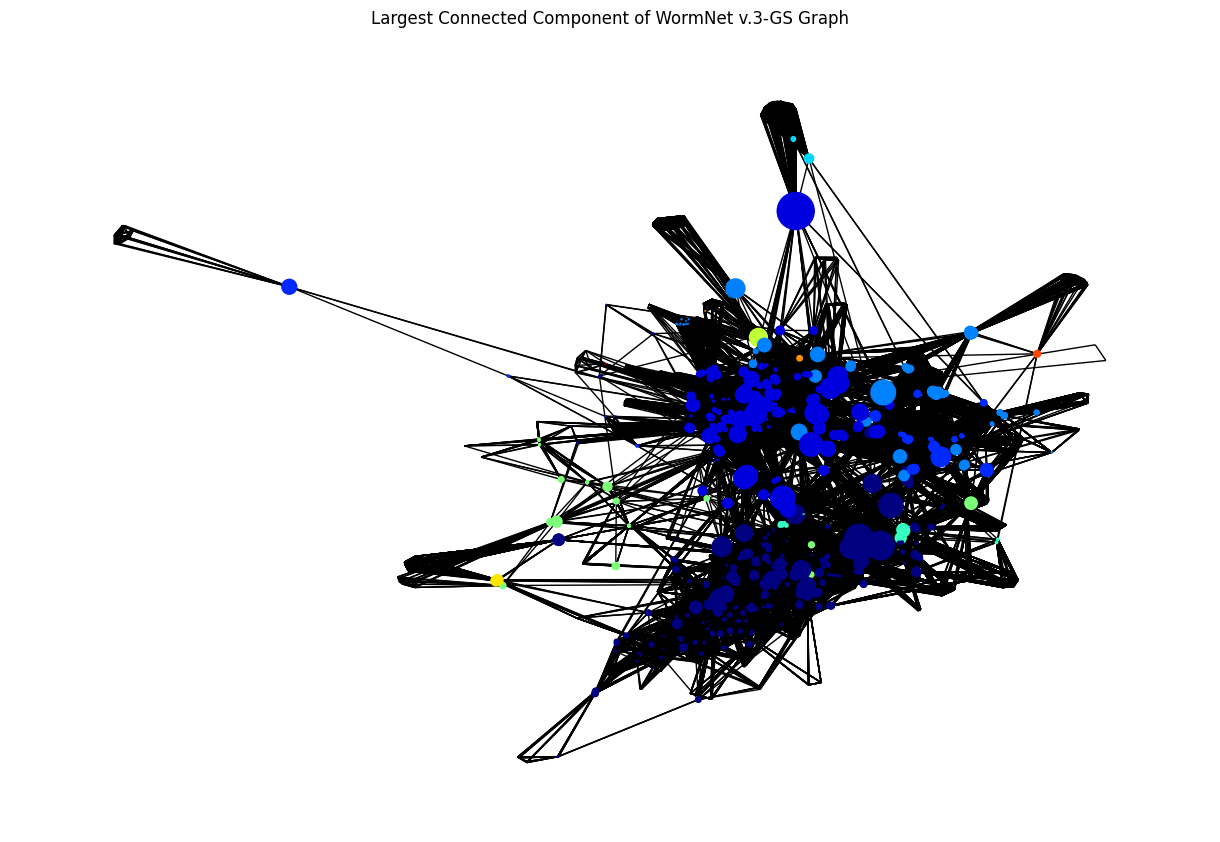

In [24]:
# Call the function with the full graph
plot_largest_component(G_wormnet_full)

# Conclusion
In summary, graph mining and network analysis, as demonstrated through Python and NetworkX, offer valuable insights into complex network structures and relationships, making them indispensable in fields ranging from social science to bioinformatics. While they provide versatile and powerful tools for data analysis and visualization, challenges include computational intensity and scalability issues, particularly with very large networks. Despite these limitations, the ability to uncover hidden patterns and inform decision-making makes these techniques highly valuable for understanding and interpreting complex systems.